# 某地区年平均降雨量数据如下表所示：
![表格](resource\某地区年平均降雨量数据.jpg)

规定 $\xi$=320，并认为 $x^{(0)}(i)\le \xi$ 为旱灾，请预测下一次旱灾发生的时间

# 灾难预测

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gray_forecast_model import GrayForecastModel

plt.style.use('matlab')
plt.rcParams['xtick.minor.visible'] = False

In [2]:
# 旱灾发生时间
X_0 = [3, 8, 10, 14, 17]
GM = GrayForecastModel(X_0)
print(f'下一次旱灾发生的时间在{(GM.forecast(1, False)[-1] - X_0[-1]):.2f}年后')

警告：原始数据无法通过级比检验，需对数据进行平移变换
关联度：              0.7294
均方差比值：          0.0565
平均相对误差：        0.01779
关联度检验：          通过
后验差检验精度：      优
相对误差检验精度：    合格
------------------------------------------------------------
下一次旱灾发生的时间在5.03年后


# 菌落生长曲线预测

警告：原始数据无法通过级比检验，需对数据进行平移变换
关联度：              0.616
均方差比值：          0.0512
平均相对误差：        0.36339
关联度检验：          通过
后验差检验精度：      优
相对误差检验精度：    不合格
------------------------------------------------------------
后面的预测值为： [4.75712801 4.76470105 4.76924617 4.77197125 4.77360409 4.77458213
 4.77516782 4.77551851 4.77572847 4.77585417]


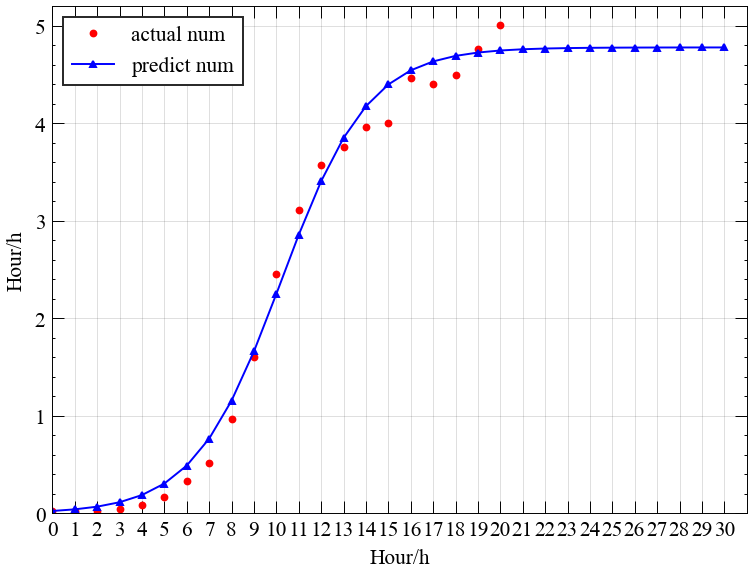

In [3]:
# 细菌数量预测
origin_data = [0.025, 0.023, 0.029, 0.044, 0.084, 0.164, 0.332, 0.521, 0.97, 1.6,
                2.45, 3.11, 3.57, 3.76, 3.96, 4, 4.46, 4.4, 4.49, 4.76, 5.01]
hour = np.arange(0, 21)
hour_ = np.arange(0, 31)
GM.setModel(origin_data, GM.VERHULST)
GM.forecast(10, True, hour, hour_, xlabel='Hour/h', ylabel='Hour/h',ylim=(0,5.2),xlim=(0,31))
print('后面的预测值为：', GM.forecast_series[len(origin_data):])
plt.legend(['actual num', 'predict num'])
_ = plt.xticks(hour_, [str(i) for i in hour_])

警告：原始数据无法通过级比检验，需对数据进行平移变换
关联度：              0.8852
均方差比值：          188.296
平均相对误差：        6.64995
关联度检验：          通过
后验差检验精度：      不合格
相对误差检验精度：    不合格
------------------------------------------------------------


array([5.60823000e+05, 3.03746102e+07, 6.83450076e+06, 1.53781070e+06,
       3.46018216e+05, 7.78565304e+04, 1.75182665e+04, 3.94173309e+03,
       8.86917647e+02, 1.99562704e+02, 4.49030109e+01, 1.01034930e+01,
       2.27335694e+00])

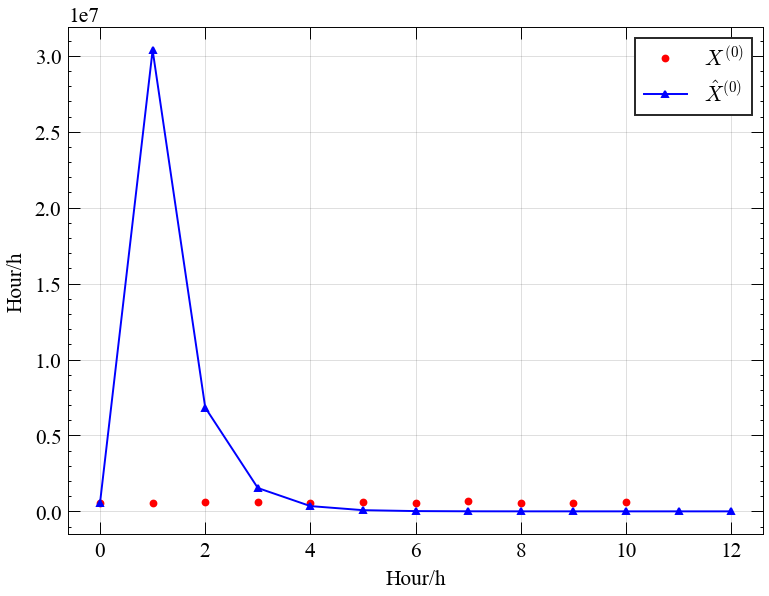

In [5]:
org_data = [[560823, 542386, 604834, 591248, 583031, 640636,
             575688, 689637, 570790, 519574, 614677],
            [104, 101.8, 105.8, 111.5, 115.97, 120.03,
             113.3, 116.4, 105.1, 83.4, 73.3],
            [135.6, 140.2, 140.1, 146.9, 144, 143,
             133.3, 135.7, 125.8, 98.5, 99.8],
            [131.6, 135.5, 142.6, 143.2, 142.2,
             138.4, 138.4, 135, 122.5, 87.2, 96.5],
            [54.2, 54.9, 54.8, 56.3, 54.5, 54.6,
             54.9, 54.8, 49.3, 41.5, 48.9]]
GM.setModel(org_data, GM.GM_1_N)
GM.forecast(2, True, np.arange(0, 11), np.arange(
        0, 13), xlabel='Hour/h', ylabel='Hour/h')